## This notebook is mostly for data preprocessing and GPR model for forecast ## 
# Mohammadmehdi Ezzatabadipour (Ph.D.) #
# Summer Intern for AAET Team of Anadarko 2019 # 
# Contact Information: mohammadmehdi.ezzatabadipour@anadarko.com #
# Contact Information: mehdi.ezatabadi3@gmail.com # 


In [2]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from numpy import concatenate
from numpy import sqrt
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd 
import numpy as np
import warnings
import itertools
import statsmodels.api as sm
from numpy.random import seed
seed(42)
#set_random_seed(42)



import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')
import sklearn
#print sklearn.__version__
from sklearn.model_selection import ShuffleSplit, train_test_split
#from CastFloatCastInt import castFloat, castInt 
%matplotlib inline

In [3]:
## List of Well IDs and parameters in the csv files ##
listNames=["4230133468","4247536931","4247537091","4247537106","l4247537154","4247537186"]
list_Params=['date_time','stage_number','prop_conc_1','bh_prop_conc','fr_conc_2','slurry_rate','wellhead_pressure_1']

# Reading data files into panda data frame #
# Make sure the address of the data is correct #

In [6]:
def readFiles(ID):
    Name='../Data/full'+ID+'.csv'
    return pd.read_csv(Name)

## Small Preprocessing steps ## 
## Picking the stage number and remove the zero prop concentration and slurry rate ##

In [4]:
from sklearn import preprocessing
from sklearn.preprocessing import minmax_scale

def Preprocess(df,List):
    df=df[List]
    df = df[(df.slurry_rate > 0 )]
    df = df[(df.prop_conc_1 > 0)]    
    df['date_time']=pd.to_datetime(df.date_time.iloc[:])
    t = list((df.date_time-df.date_time.iloc[0]).dt.total_seconds())
    df['time'] = list(t)   
    return df 

def diff_Scale(df,stage_num):
    df1=df[(df.stage_number==stage_num)].copy()
    prConc=list(df1["prop_conc_1"])
    ##list(minmax_scale(df1[["prop_conc_1"]],feature_range=(0,1)))
#    print(prConc)
#    prConc=[val[0] for val in prConc]
    dPrConc=[0]
    for i in range(1,len(prConc)):
        dPrConc.append(prConc[i]-prConc[i-1])

        
    P=list(df1["wellhead_pressure_1"])
    #list(minmax_scale(df1[["wellhead_pressure_1"]],feature_range=(0,1)))
#    P=[val[0] for val in P]
    
    dP=[0]
    for i in range(1,len(P)):
        dP.append(P[i]-P[i-1])
        
    frConc=list(df1["fr_conc_2"])
    #list(minmax_scale(df1[["fr_conc_2"]],feature_range=(0,1)))
#    frConc=[val[0] for val in frConc]

    dFrConc=[0]
    for i in range(1,len(frConc)):
        dFrConc.append(frConc[i]-frConc[i-1])

    
    
#    sRate=list(minmax_scale(df1[['slurry_rate']],feature_range=(0,1)))
    sRate=list(df1['slurry_rate'])
    bPrConc=list(df1['bh_prop_conc'])
    dBprConc=[0]
    for i in range(1,len(bPrConc)):
        dBprConc.append(bPrConc[i]-bPrConc[i-1])
    
    
    time=[t[0] for t in df1[['time']].values]
    return pd.DataFrame({'Time':time,'P':P,'dP':dP, 'frConc':frConc, 'Diff_FracConc':dFrConc,'sRate':sRate,'prConc':prConc, 'Diff_prConc':dPrConc ,'bPropConc':bPrConc ,'Diff_bPropConc':dBprConc})
    

In [7]:
## Reading file with specfic ID and picking up stage and removing zeros ## 
df=readFiles("4230133468") ## Well ID ## 
#print(df)
print(df.stage_number.max(),df.stage_number.min()) ## Finding the min and max of stages numbers ## 
df=Preprocess(df,list_Params) ## Preprocessing and removing zeros 
scaledFrame=diff_Scale(df,15) ## selecting specfic stage ## 

36 1


## Categorizing based on stage and Pairwise Correlation plot between relevant parameters ## 

stage=13


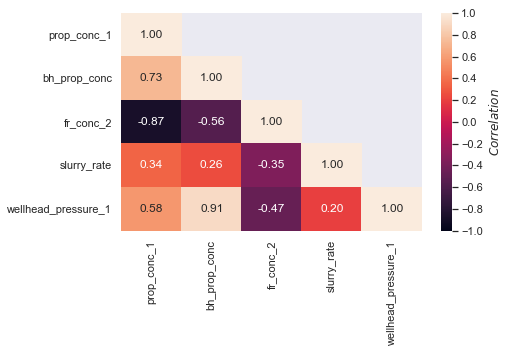

stage=14


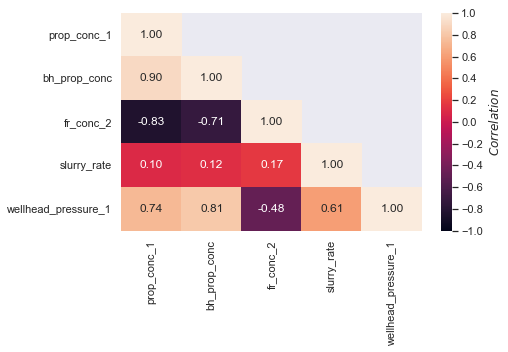

stage=15


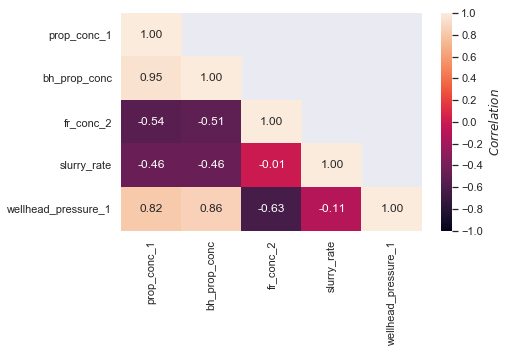

stage=16


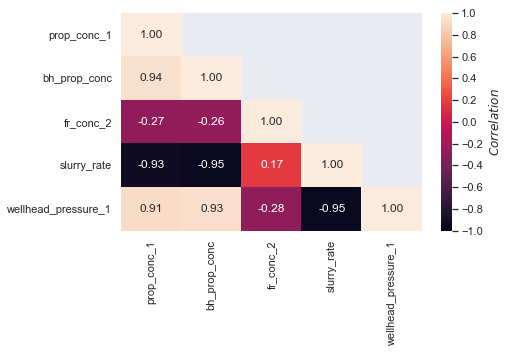

Correlation over all the stages


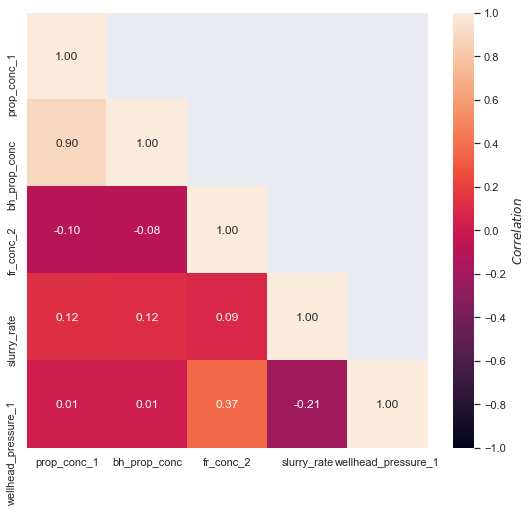

In [12]:
import seaborn as sns; sns.set()
import matplotlib as mpl
plt.clf()

for i in range(13,17): ## Iteration over range of stage numbers ## 
    print("stage="+str(i))
#   df_stage= ShiftMean(df,i)#_shift[(df_shift.stage_number==i)]
    df_stage= df[(df.stage_number==i)].copy()   
    Corr=df_stage[['prop_conc_1','bh_prop_conc','fr_conc_2','slurry_rate','wellhead_pressure_1']].corr()
#    print (Corr)
    mask = np.zeros_like(Corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    for i in range(5):
        mask[i,i]=False
    Corr=df_stage[['prop_conc_1','bh_prop_conc','fr_conc_2','slurry_rate','wellhead_pressure_1']].corr()
#    print (Corr)
    mask = np.zeros_like(Corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    for i in range(5):
        mask[i,i]=False
#cmap1 = mpl.colors.ListedColormap(['white'])
#with sns.axes_style("white"):
    sns.heatmap(Corr,mask=mask,annot=True, vmin=-1.0, vmax=1.0,cbar_kws={'label':'$Correlation$',"ticks":[-1.0,-0.8,-0.6,-0.4,-0.2,0.0,0.2,0.4,0.6,0.8,1.0]},fmt='0.2f')
#plt.savefig("Images/KARNES_CorrMap.eps")
#plt.savefig("Images/KARNES_CorrMap.png")
    plt.show()


fig, ax = plt.subplots(figsize=(8,8))
#corr_mat = np.triu(Corr, k=0)

# Plot the heatmap
print("Correlation over all the stages")
## Set diagonal elements to False ##    Mask telling heatmap where to hide data if mask[i,j]=True, the element(i,j) is blank
Corr=df[['prop_conc_1','bh_prop_conc','fr_conc_2','slurry_rate','wellhead_pressure_1']].corr()
mask = np.zeros_like(Corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
for i in range(5):
    mask[i,i]=False
#cmap1 = mpl.colors.ListedColormap(['white'])
#with sns.axes_style("white"):
sns.heatmap(Corr,mask=mask,annot=True, vmin=-1.0, vmax=1.0,cbar_kws={'label':'$Correlation$',"ticks":[-1.0,-0.8,-0.6,-0.4,-0.2,0.0,0.2,0.4,0.6,0.8,1.0]},fmt='0.2f')
#plt.savefig("Images/KARNES_CorrMap.eps") ## saving png or eps files 
#plt.savefig("Images/KARNES_CorrMap.png")
plt.show()

## Autocorrelation coefficients ##
 $\langle A(t)A(t-\tau) \rangle - \langle A(t) \rangle \langle A(t-\tau) \rangle$ as a function of $\tau$ 
 ##
 Please refer to autocorr2(timeseries, the range of $\tau$)   

In [15]:
## Time Autocorrelation ##
## Autocorr2 is our aim ##
import matplotlib as mpl
import matplotlib.style
mpl.style.use('default')  ## Very important 
import numpy 
def autocorr1(x,lags): 
    '''numpy.corrcoef, partial'''

    corr=[1. if l==0 else numpy.corrcoef(x[l:],x[:-l])[0][1] for l in lags]
    return numpy.array(corr)

def autocorr2(x,lags):
    '''manualy compute, non partial'''

    mean=numpy.mean(x)
    var=numpy.var(x)
    xp=x-mean
    corr=[1. if l==0 else numpy.sum(xp[l:]*xp[:-l])/len(x)/var for l in lags]

    return numpy.array(corr)

def autocorr3(x,lags):
    '''fft, pad 0s, non partial'''

    n=len(x)
    # pad 0s to 2n-1
    ext_size=2*n-1
    # nearest power of 2
    fsize=2**numpy.ceil(numpy.log2(ext_size)).astype('int')

    xp=x-numpy.mean(x)
    var=numpy.var(x)

    # do fft and ifft
    cf=numpy.fft.fft(xp,fsize)
    sf=cf.conjugate()*cf
    corr=numpy.fft.ifft(sf).real
    corr=corr/var/n

    return corr[:len(lags)]

def autocorr4(x,lags):
    '''fft, don't pad 0s, non partial'''
    mean=x.mean()
    var=numpy.var(x)
    xp=x-mean

    cf=numpy.fft.fft(xp)
    sf=cf.conjugate()*cf
    corr=numpy.fft.ifft(sf).real/var/len(x)

    return corr[:len(lags)]

def autocorr5(x,lags):
    '''numpy.correlate, non partial'''
    mean=x.mean()
    var=numpy.var(x)
    xp=x-mean
    corr=numpy.correlate(xp,xp,'full')[len(x)-1:]/var/len(x)

    return corr[:len(lags)]

[7686.05 7686.33 7687.69 ... 7647.41 7649.13 7650.17]
[ 1.          0.99950618  0.9989446  ... -0.04658939 -0.04567978
 -0.04477229]


<Figure size 640x480 with 0 Axes>

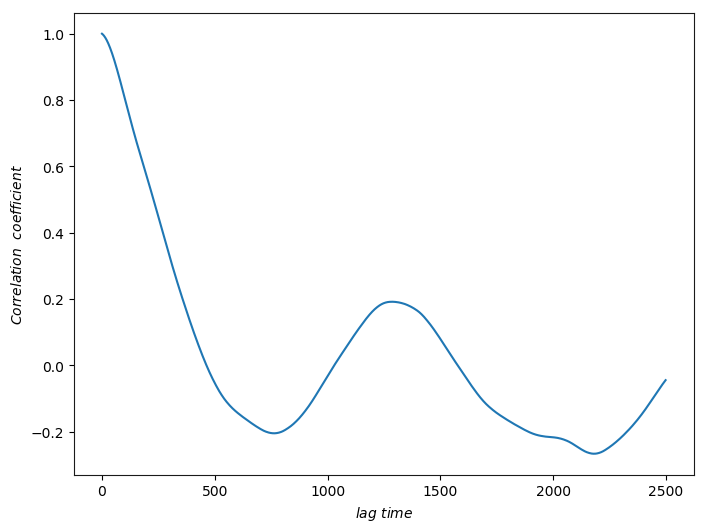

In [16]:
Y=df[(df.stage_number==i)].copy() ## Stage 15 ## 
y=Y.wellhead_pressure_1
#y=Y.bh_prop_conc
y=np.array(y).astype('float')
print(y)

lags=range(2500)
#    for funcii, labelii in zip([autocorr2], ['']):

cii=autocorr2(y,lags)
#print(labelii)
print(cii)

plt.clf()
fig, ax = plt.subplots(figsize=(8,6),frameon=True)
#ax.axis('on')
#ax.set_facecolor((1, 1, 1))
ax.spines['bottom'].set_color('k')
ax.spines['top'].set_color('k') 
ax.spines['right'].set_color('k')
ax.spines['left'].set_color('k')
ax.plot(lags,cii)#,'k')#,label="")#ID 03451500")
#ax.set_title("ID 03451500, Autocorrelation function of Q")
ax.set_xlabel('$lag$ $time$')
ax.set_ylabel('$Correlation$  $coefficient$')
plt.rc('lines', lw=2, color='r')
plt.grid(False)
#ax.legend()
#plt.savefig("Images/ACF_Q_FrenchRiver.eps")
#plt.savefig("Images/ACF_Q_FrenchRiver.png")
plt.show()


## Preparing data for GPR (Gaussian Process Regression) ##
# Creating Input and Output files # 
# Input # 
$\begin{array}{l}{\left(X_{t-\Delta t}^{1}, \ldots, X_{t-1}^{1}, X_{t}^{1}\right)} \\ {\left(X_{t-\Delta t}^{2}, \ldots, X_{t-1}^{2}, X_{t}^{2}\right)} \\ {\left(X_{t-\Delta t}^{3}, \ldots, X_{t-1}^{3}, X_{t}^{3}\right)} \\ {\left(y_{t-\Delta t}, \ldots, y_{t-1}, y_{t}\right)}\end{array}$
# Output # 
$y_{t+1}$


In [8]:
dTime=1 ## Roughtly 5 minutes delay time 
lag=2*60 ## The depth of history to check, Time Window for input is 2 mins ## 
(x,y)=scaledFrame.shape[:] ## The dimention of dataframes ## 
sampleSize=x ## Sample Size 

Inputs=[]
OutPuts=[]
for i in range(lag,sampleSize-1):
    X=[]  ## is one datapoint for input ## 
    OutPuts.append(scaledFrame.loc[i+1,"dP"]) ## I use dp (p(t+1)-p(t)) as output ## 
    for j in range(lag):#:,sampleSize-dTime):
        X.append(scaledFrame.loc[i-j,"Diff_prConc"])
        X.append(scaledFrame.loc[i-j,"sRate"])
        X.append(scaledFrame.loc[i-j,"Diff_FracConc"])
        X.append(scaledFrame.loc[i-j,"dP"])
    Inputs.append(X)

## Perforemance metrics ## 

In [14]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from functools import partial
from collections import defaultdict 
from pprint import pprint

#import WB as WB

def WB(Yo,Yp):
    sum_o=0
    sum_p=0
    for i in range(len(Yo)):
        sum_o+=Yo[i]
        sum_p+=Yp[i]
    return 1-abs(1-sum_p/sum_o)

def NSE(Yo, Yp):
    sum_o=0
    sum_p=0
    for i in range(len(Yo)):
        sum_o+=Yo[i]
        sum_p+=Yp[i]
    meano=sum_o/len(Yo)
    meanp=sum_p/len(Yp)
    
    numerator=0
    denumerator=0
    for i in range(len(Yo)):
        numerator=numerator+(Yp[i]-Yo[i])**2
        denumerator=denumerator+(Yo[i]-meano)**2
    
    return 1-numerator/denumerator

METRICS = {
    "r2_score":r2_score, # NSE 
    "MSE":mean_squared_error,
    "WB":WB,
    "NSE":NSE
}

# 1. split the data to training and testing #
# 2. Fit data to GPR model and predict for testing ## 


In [15]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels \
    import RBF, WhiteKernel, RationalQuadratic, ExpSineSquared
from sklearn.datasets import fetch_mldata
from sklearn.gaussian_process.kernels import Matern, ConstantKernel
import time 

L=len(Inputs)
trFrac=int(L*0.2) ## Use the first 20% as training ## 
teFrac=int(L*0.24) ## Check the performace for next 4% as a test ## 
X_train=Inputs[:trFrac]
X_test=Inputs[trFrac:teFrac]
Y_train=OutPuts[:trFrac]#:int(L*0.22)]
Y_test=OutPuts[trFrac:teFrac]
t1=time.time()
print(t1)
BestMatern=ConstantKernel()+Matern(length_scale=1,nu=15)+WhiteKernel(noise_level=0.001) ## Defining the kernel 
gp_matern=GaussianProcessRegressor(kernel=BestMatern,optimizer='fmin_l_bfgs_b', n_restarts_optimizer=1, normalize_y=True) ## Setting the kernel 
gp_matern.fit(X_train, Y_train) ## Fitting the training 
mY_pred=gp_matern.predict(X_test) ## Makeing prediction #
t2=time.time()
print(t2-t1)

print("GPML kernel: %s" % gp_matern.kernel_)
print("Log-marginal-likelihood: %.3f"
          % gp_matern.log_marginal_likelihood(gp_matern.kernel_.theta))
print("r2_score: %.3f"
        % gp_matern.score(X_test,Y_test))
t3=time.time()
print(t3-t2)


1560958374.3578024
779.3113083839417
GPML kernel: 0.00316**2 + Matern(length_scale=19.1, nu=15) + WhiteKernel(noise_level=0.375)
Log-marginal-likelihood: -1628.041
r2_score: 0.450
4.481961965560913


In [ ]:
## Prining the hyper params for GP model ## 
gp=gp_matern
print(gp.get_params)

In [17]:
## Small test to check the time performance for prediciton time after builing and fitting the model ## 
gp=gp_matern
t1=time.time()
Yp_pred,Yp_std=gp.predict(Inputs,return_std=True)
t2=time.time()
print(t2-t1)

30.295776844024658


In [18]:
## Appending the predicted P and dP and sigma of prediciton as new columns to dataframes ## 
dPred=list(scaledFrame.loc[:dTime+lag-1,'dP'])
for i in Yp_pred:
    dPred.append(i)

print(len(dPred),scaledFrame.shape[:])
Pred=list(scaledFrame.loc[:dTime+lag-1,'P'])
for i in Yp_pred:
    Pred.append(i+Pred[-1])
sPred=[0 for i in range(dTime+lag)]   
for i in Yp_std:
    sPred.append(i)
    
scaledFrame['dP_Pred']=dPred ## Predicted dP (difference of Pressure (P(t+1)-P(t)))
scaledFrame['P_Pred']=Pred   ## Predicted Pressue 
scaledFrame['sP']=sPred ## Calculated Standard deviation of prediciton model


8073 (8073, 10)


## Plotting the GPR results on the scattering plots as well as time series comparision with reallity ## 

<Figure size 432x288 with 0 Axes>

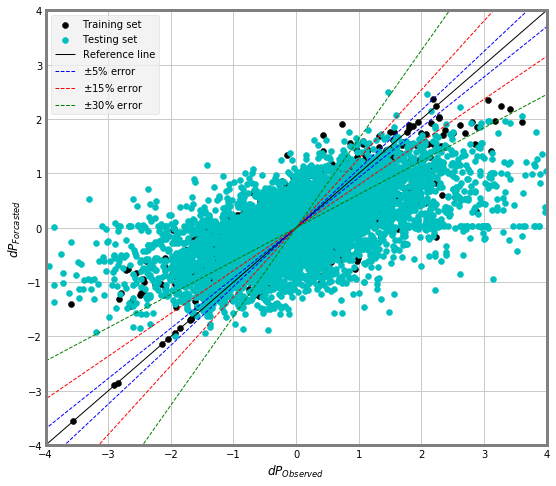

<Figure size 432x288 with 0 Axes>

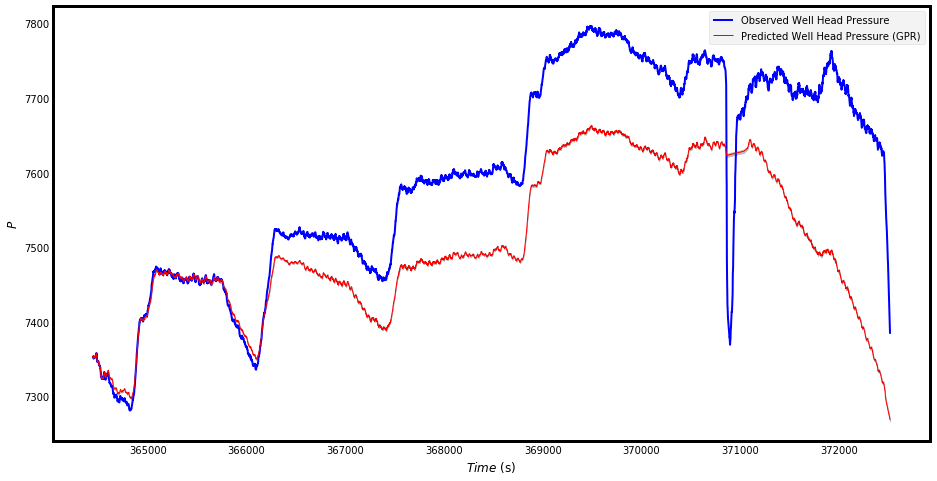

<Figure size 432x288 with 0 Axes>

In [22]:
plt.clf()
fig, ax = plt.subplots(figsize=(8,8),frameon=True)
#print plt
#ax.clear()
train=int(0.2*L)
test=int(L)
ax.set_facecolor((1, 1, 1))
a1=plt.scatter(scaledFrame.loc[:train,"dP"],scaledFrame.loc[:train,"dP_Pred"],label="Training Set",c='k')#, label="Monthly average of Daily prediction")
a2=plt.scatter(scaledFrame.loc[train:test,"dP"],scaledFrame.loc[train:test,"dP_Pred"],label="Testing Set",c='c')#, label="Monthly average of Daily prediction")
#ax.set_frame_on(True)
#ax.set_frame()
#ax.set_linewidth(2) 
plt.xlim(-4,4)
plt.ylim(-4,4)

ax.legend()
#plt.title("Monthly average of Daily prediction")
q0 = np.arange(-40,40, 0.1)
q = q0
## Error Angles ## 
coefs=[math.tan(math.radians(45*(0.95))),math.tan(math.radians(45*(1.05))),math.tan(math.radians(0.85*45)),math.tan(math.radians(1.15*45)),math.tan(math.radians(0.7*45)),math.tan(math.radians(1.3*45))]

q10=coefs[0]*q0
q11=coefs[1]*q0
q20=coefs[2]*q0
q21=coefs[3]*q0
q30=coefs[4]*q0
q31=coefs[5]*q0

a3,=plt.plot(q0,q,label="Reference line",c='k')
a4,=plt.plot(q0,q10,label="$\pm 5%$ error",ls='--',c='b')
plt.plot(q0,q11,ls='--',c='b')
a5,=plt.plot(q0,q20,label="$\pm 15%$ error",ls='--',c='r')
plt.plot(q0,q21,ls='--',c='r')
a6,=plt.plot(q0,q30,label="$\pm 30%$ error",ls='--',c='g')
plt.plot(q0,q31,ls='--',c='g')

plt.xlabel("$dP_{Observed}$ ")
plt.ylabel("$dP_{Forcasted}$")
#plt.xlim(0,200)
#plt.ylim(0,200)
#plt.grid(False)


ax.spines['bottom'].set_color('0.5')
ax.spines['top'].set_color('0.5') 
ax.spines['right'].set_color('0.5')
ax.spines['left'].set_color('0.5')
plt.rc('lines', lw=1, color='b')
legends=["Training set","Testing set","Reference line","$\pm 5\%$ error","$\pm 15\%$ error","$\pm 30\%$ error"]
plt.legend([a1,a2,a3,a4,a5,a6],legends)
plt.savefig("Images/GPR_Q0_Q.eps")
plt.savefig("Images/GPR_Q0_Q.png")
plt.show()
plt.clf()
############################
#####################
##############
#######

fig, ax2 = plt.subplots(figsize=(14,8),frameon=True)
ax2.set_facecolor((1, 1, 1))
ax2.spines['bottom'].set_color('k')
ax2.spines['top'].set_color('k') 
ax2.spines['right'].set_color('k')
ax2.spines['left'].set_color('k')
#plt.show()

#ax.spines(color='black')
#, label="Monthly average of Daily prediction")
ax2.plot(scaledFrame.loc[:,"Time"], scaledFrame.loc[:,"P"],'b',linewidth=2,label='Observed Well Head Pressure')
ax2.plot(scaledFrame.loc[:,"Time"], scaledFrame.loc[:,"P_Pred"],'r',linewidth=1,label='Predicted Well Head Pressure (GPR)')
ax2.legend()
#c=mt_Frame[["Time"]]
t0=scaledFrame.loc[0,'Time']
#tE=scaledFrame.loc[-1,'Time']
plt.fill_between(scaledFrame.loc[:,"Time"],scaledFrame.loc[:,"P_Pred"]-2*scaledFrame.loc[:,"sP"], scaledFrame.loc[:,"P_Pred"]+2*scaledFrame.loc[:,"sP"], alpha=0.5, color = '0.5')
plt.xlabel("$Time$ (s)")
plt.ylabel("$P$ ")
#plt.ylim(-5,5)
#plt.xlim(t0+420,375000)
#plt.xlim(366000,366500)
#plt.xlim(1988,2004)
#plt.title("ID 03451500, NSE=0.52")
#x=[i for i in range(1988,2005,2)]
#plt.xticks(x)
plt.grid(False)
plt.savefig("Images/GPR_timeseries_Q0_Q_Test.eps")
plt.savefig("Images/GPR_timeseries_Q0_Q_Test.png")


#
#plt.xlabel("Q")
#plt.ylabel(r"$Q_{pred}$")
#plt.title(r"")
#plt.tight_layout()
plt.show()
plt.clf()
